<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/Copy_of_Copy_of_telematics_syn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload the dataset to Google Colab

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving telematics_syn.csv to telematics_syn.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Read the uploaded CSV file

In [ ]:
# Read the CSV file
df = pd.read_csv('telematics_syn.csv')

In [ ]:
categorical_cols = ['Insured.sex', 'Marital', 'Car.use', 'Region', 'Territory']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop(['NB_Claim', 'AMT_Claim'])  # Exclude target columns

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
X = df.drop(columns=['NB_Claim', 'AMT_Claim'])
X_preprocessed = pipeline.fit_transform(X)

In [10]:
y_nb_claim = df['NB_Claim']
y_amt_claim = df['AMT_Claim']

In [11]:
from sklearn.model_selection import train_test_split

# Assuming X_preprocessed is your preprocessed feature matrix and y_nb_claim and y_amt_claim are your target variables

# First, split the data into training and a temporary set (which will be further split into validation and test sets)
X_train, X_temp, y_nb_train, y_nb_temp, y_amt_train, y_amt_temp = train_test_split(
    X_preprocessed, y_nb_claim, y_amt_claim, test_size=0.3, random_state=42
)

# Now, split the temporary set into validation and test sets
X_val, X_test, y_nb_val, y_nb_test, y_amt_val, y_amt_test = train_test_split(
    X_temp, y_nb_temp, y_amt_temp, test_size=0.5, random_state=42
)

# Print the sizes of the resulting sets
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 70000 samples
Validation set: 15000 samples
Test set: 15000 samples


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [13]:
def create_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Assuming binary classification for 'NB_Claim'
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [14]:
input_dim = X_train.shape[1]
model = create_model(input_dim)

history = model.fit(
    X_train, y_nb_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_nb_val),
    verbose=1
)

Epoch 1/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.1591 - accuracy: 0.9568 - val_loss: 0.1469 - val_accuracy: 0.9593
Epoch 2/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.1476 - accuracy: 0.9578 - val_loss: 0.1455 - val_accuracy: 0.9592
Epoch 3/20
2188/2188 [==============================] - 6s 3ms/step - loss: 0.1397 - accuracy: 0.9584 - val_loss: 0.1413 - val_accuracy: 0.9595
Epoch 4/20
2188/2188 [==============================] - 8s 4ms/step - loss: 0.1279 - accuracy: 0.9587 - val_loss: 0.1419 - val_accuracy: 0.9594
Epoch 5/20
2188/2188 [==============================] - 6s 3ms/step - loss: 0.0978 - accuracy: 0.9588 - val_loss: 0.1426 - val_accuracy: 0.9589
Epoch 6/20
2188/2188 [==============================] - 7s 3ms/step - loss: -0.0020 - accuracy: 0.9588 - val_loss: 0.1409 - val_accuracy: 0.9581
Epoch 7/20
2188/2188 [==============================] - 6s 3ms/step - loss: -0.3290 - accuracy: 0.9582 - val_loss: 0.1477 - val_accurac

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_nb_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: -303.2677
Test Accuracy: 0.9541


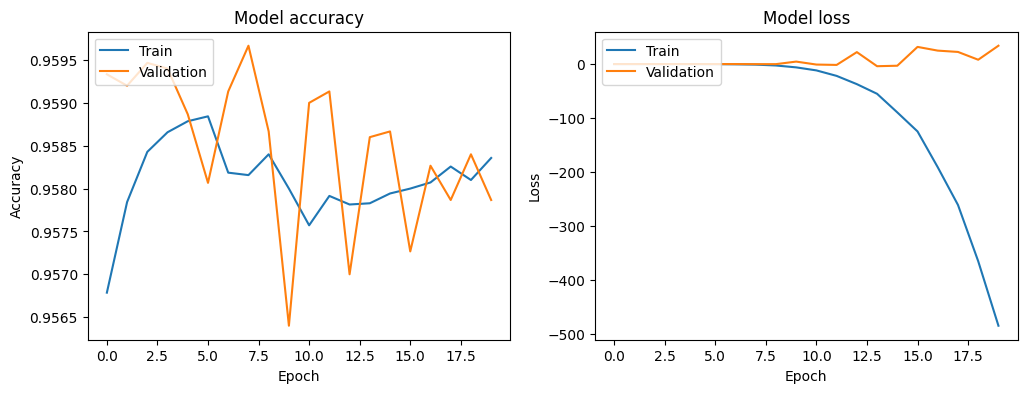

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()